Installing the necessary Libraries and packages  

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import string 
import spacy

import gensim
from gensim.models import word2vec,KeyedVectors
from gensim.models.word2vec import Word2Vec


In [ ]:
np.random.seed(42)

Mounting to google Drive and getting the dataset 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive/data_set/IMDB Dataset.csv"
df = pd.read_csv(path)
df

Mounted at /content/drive


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


Doing some basic preprocessing 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [ ]:
df.duplicated().sum()

418

In [ ]:
df[df.duplicated()]

,review,sentiment
3537,Quite what the producers of this appalling ada...,negative
3769,My favourite police series of all time turns t...,positive
4391,"Beautiful film, pure Cassavetes style. Gena Ro...",positive
6352,If you liked the Grinch movie... go watch that...,negative
6479,I want very much to believe that the above quo...,negative
...,...,...
49912,This is an incredible piece of drama and power...,positive
49950,This was a very brief episode that appeared in...,negative
49984,Hello it is I Derrick Cannon and I welcome you...,negative
49986,This movie is a disgrace to the Major League F...,negative


In [ ]:
df.drop_duplicates(inplace =True)

In [ ]:
#converting the string (positive --> 1 and negative --> 0)
df['sentiment_new']  = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

In [ ]:
#To remove tags from the text 

import re 
def remove_tags(raw_text):
  cleaned_text = re.sub(re.compile('<.*?>'), '', raw_text)
  return cleaned_text

df['review'] = df['review'].apply(remove_tags)

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 

#for removing stop words 
stop_word_list = stopwords.words('english')
def remove_stops(sentence):
  word= []
  for item in sentence.lower().split():
    if item not in stop_word_list:
      word.append(item)
  return " ".join(word)

df['review'] = df['review'].apply(remove_stops)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
print(stop_word_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
# #tokenizer 
# def spacy_tokenizer(sentence):

#   #stop words 
#   nlp = spacy.load("en_core_web_sm")
#   stop_words = nlp.Defaults.stop_words

#   #punctuations
#   punctuations = string.punctuation
   
#   #creating token 
#   doc = nlp(sentence)
  
#   #lemmatizing each token , converting each token in lowercase 
#   tokens = [word.lemma_.lower().strip() for word in doc]

#   #removing stops words and punctuations 
#   # tokens = [ word for word in tokens if word not in stop_words and word not in punctuations]

#   return tokens 

Training models 

In [ ]:
X = df['review']
ylabels = df['sentiment_new']
X_train,X_test,y_train,y_test = train_test_split(X,ylabels ,test_size =0.2,stratify = ylabels)

Bag of words embedding 

In [ ]:
#bag of word model 

def bag_of_words_model(X_train,X_test,y_train,y_test):
  #using countvectorizer
  count_vector  = CountVectorizer()
  #using classification model (logistic regression)
  classifier = LogisticRegression(max_iter=10000)
  X_train_vector = count_vector.fit_transform(X_train)
  X_test_vector = count_vector.transform(X_test)
  classifier.fit(X_train_vector,y_train)
  predicted = classifier.predict(X_test_vector)
  print("Logistic Regression Accuracy: ",metrics.accuracy_score(y_test,predicted))

  return predicted

model_BOW = bag_of_words_model(X_train,X_test,y_train,y_test)

Logistic Regression Accuracy:  0.8864575980639307


<Figure size 1500x700 with 0 Axes>

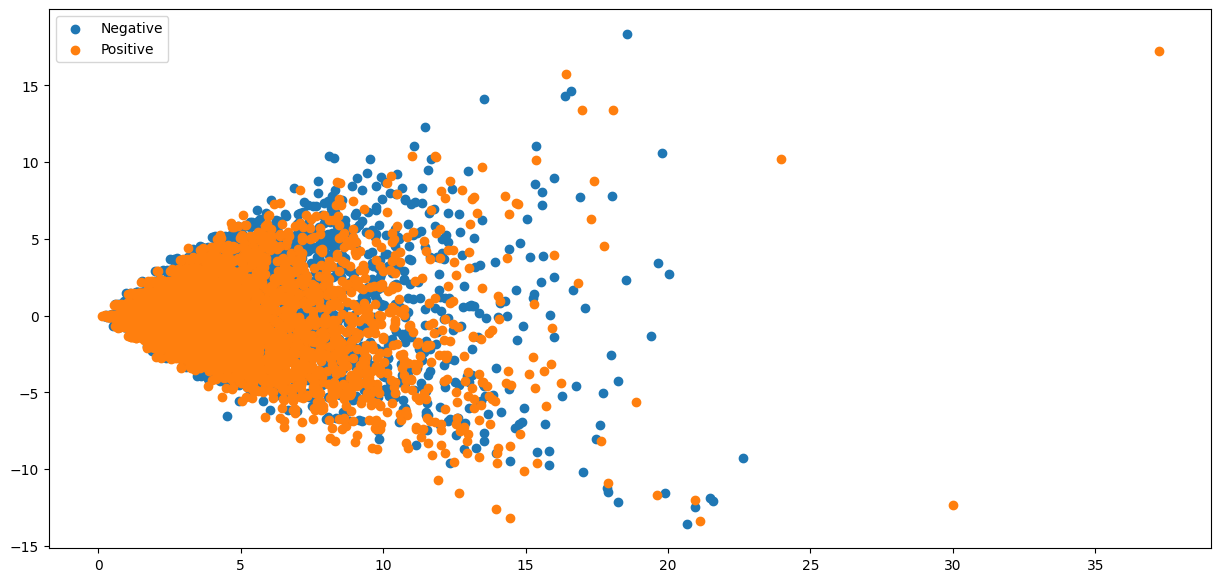

In [ ]:
# dimensionality reduction for bag of words 

from sklearn.decomposition import PCA,TruncatedSVD

count_vector  = CountVectorizer()
test_data_BOW = count_vector.fit_transform(X_test)

# print(test_data_BOW)

'''
using TruncatedSVD to avoid runtime crash 
'''
truncaded_svd = TruncatedSVD(n_components=2)
test_data_BOW_pca = truncaded_svd.fit_transform(test_data_BOW)


'''
Plotting the result
'''
plt.figure(figsize=(15,7))
from numpy import where

plt.figure(figsize=(15,7))
for class_value in range(2):

 # get row indexes for samples with this class
 row = where(y_test == class_value)
 if class_value == 0:
    label = "Negative"
 else:
    label = "Positive"
# create scatter of these samples
 plot = plt.scatter(test_data_BOW_pca[row, 0], test_data_BOW_pca[row, 1] ,label=label)
plt.legend()
plt.show()

In [ ]:
test_data_BOW.shape

(9917, 52699)

TFIDF embedding 

In [ ]:
# TfIdf model 

def tfidf_model(X_train,X_test,y_train,y_test):
  #using countvectorizer
  tfidf_vector  = TfidfVectorizer()
  #using classification model (logistic regression)
  classifier = LogisticRegression()
  X_train_vector = tfidf_vector.fit_transform(X_train)
  X_test_vector = tfidf_vector.transform(X_test)
  classifier.fit(X_train_vector,y_train)
  predicted = classifier.predict(X_test_vector)
  print("Logistic Regression Accuracy: ",metrics.accuracy_score(y_test,predicted))
  

model_tfid = tfidf_model(X_train,X_test,y_train,y_test)

Logistic Regression Accuracy:  0.8961379449430271


<Figure size 1500x700 with 0 Axes>

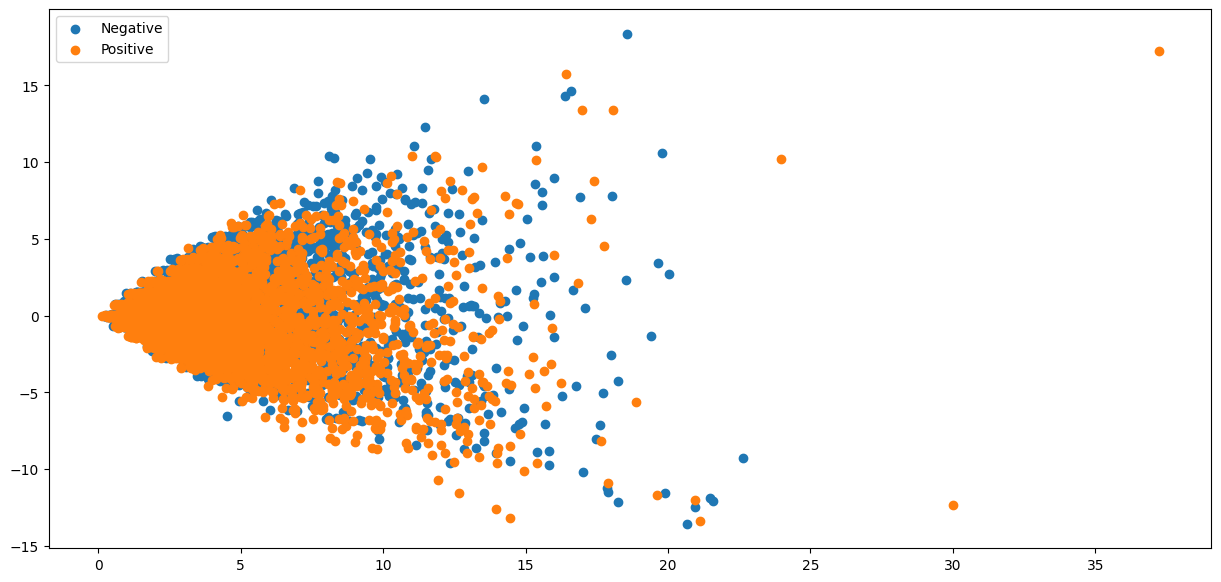

In [ ]:
# dimensionality reduction for bag of words 

tdidf_vector  = TfidfVectorizer()
test_data_tfidf = count_vector.fit_transform(X_test)

# print(test_data_tfidf)

'''
using TruncatedSVD to avoid runtime crash 
'''
truncaded_svd = TruncatedSVD(n_components=2)
test_data_tfidf_pca = truncaded_svd.fit_transform(test_data_tfidf)


'''
Plotting the result
'''
plt.figure(figsize=(15,7))
from numpy import where

plt.figure(figsize=(15,7))
for class_value in range(2):

 # get row indexes for samples with this class
 row = where(y_test == class_value)
 if class_value == 0:
    label = "Negative"
 else:
    label = "Positive"
 # create scatter of these samples
 plt.scatter(test_data_tfidf_pca[row, 0], test_data_tfidf_pca[row, 1],label = label)
plt.legend()
plt.show()

Using pretrained Word2vec model for the embedding 

In [ ]:
#pretrained word2vec model 

import gensim.downloader as api

wv = api.load('word2vec-google-news-300')

In [ ]:
# from nltk import sent_tokenize
# from gensim.utils import simple_preprocess
# nltk.download('punkt')


# def tokenizer(sentence):
#    story = []
#    raw_sent = sent_tokenize(sentence)
#    for sent in raw_sent:
#       story.append(simple_preprocess(sent))
#    return story 

# df['review'].apply(tokenizer)

In [ ]:
#tokenize and convert into vector and then take the mean 

def document_vector(doc):
    # remove out-of-vocabulary words
    # print(len(doc))
    doc = [word for word in doc.split() if word in wv.index_to_key]
    return np.mean(wv[doc], axis=0)

In [ ]:
df

,review,sentiment,sentiment_new
0,one reviewers mentioned watching 1 oz episode ...,positive,1
1,wonderful little production. filming technique...,positive,1
2,thought wonderful way spend time hot summer we...,positive,1
3,basically there's family little boy (jake) thi...,negative,0
4,"petter mattei's ""love time money"" visually stu...",positive,1
...,...,...,...
49995,thought movie right good job. creative origina...,positive,1
49996,"bad plot, bad dialogue, bad acting, idiotic di...",negative,0
49997,catholic taught parochial elementary schools n...,negative,0
49998,i'm going disagree previous comment side malti...,negative,0


In [ ]:
#tokenize and convert into vector and then take the mean 

def sent_vec(sent):

    vector_size = wv.vector_size
    # print(vector_size)
    wv_res = np.zeros(vector_size)
    # print(wv_res)
    ctr = 1
    # print(len(sent),sent)
    for w in sent.split():
        # print(w)
        if w in wv:
            ctr += 1
            wv_res += wv[w]
    wv_res = wv_res/ctr
    return wv_res


In [ ]:
wv['wonderful'].reshape(300,-1)

array([[ 0.0062561 ],
       [ 0.01928711],
       [-0.08984375],
       [ 0.14257812],
       [ 0.10205078],
       [-0.13574219],
       [ 0.13867188],
       [-0.07177734],
       [-0.12597656],
       [ 0.16308594],
       [-0.08300781],
       [-0.09960938],
       [-0.0480957 ],
       [-0.09082031],
       [ 0.12207031],
       [ 0.328125  ],
       [ 0.22460938],
       [ 0.25976562],
       [-0.05151367],
       [ 0.03930664],
       [ 0.04223633],
       [ 0.22460938],
       [ 0.26171875],
       [-0.04394531],
       [ 0.25195312],
       [ 0.07617188],
       [ 0.09863281],
       [ 0.07324219],
       [-0.02661133],
       [-0.12695312],
       [-0.13574219],
       [-0.03369141],
       [ 0.15820312],
       [ 0.21972656],
       [ 0.19042969],
       [-0.09619141],
       [ 0.0279541 ],
       [-0.18066406],
       [-0.06494141],
       [ 0.16503906],
       [ 0.21484375],
       [ 0.04663086],
       [ 0.10693359],
       [-0.00994873],
       [ 0.06884766],
       [-0

In [ ]:
sent_vec('w')

array([-0.11669922,  0.03076172, -0.15234375,  0.11230469,  0.03295898,
        0.13085938, -0.08544922, -0.06689453, -0.02832031, -0.03442383,
       -0.1796875 , -0.08251953, -0.10449219, -0.15136719, -0.04370117,
        0.02734375,  0.08251953,  0.1484375 , -0.05712891, -0.04150391,
       -0.15917969, -0.07861328,  0.11181641,  0.02075195, -0.11132812,
        0.01397705, -0.18457031,  0.09814453, -0.03393555,  0.0279541 ,
        0.05419922,  0.01239014, -0.06005859, -0.08740234, -0.11767578,
       -0.00095749, -0.03686523,  0.13867188, -0.11230469, -0.0213623 ,
       -0.00570679, -0.02722168,  0.14648438, -0.01507568,  0.09472656,
       -0.08642578, -0.08691406, -0.19335938,  0.00970459,  0.03198242,
       -0.15820312,  0.15820312, -0.05371094,  0.0703125 ,  0.02478027,
        0.12597656, -0.03149414,  0.05004883,  0.00616455, -0.16601562,
       -0.05395508,  0.0123291 , -0.16308594, -0.12792969, -0.05395508,
       -0.17480469,  0.05639648, -0.01556396, -0.08789062,  0.15

In [ ]:
df['review'].head(1).apply(sent_vec)

0    [0.03534796930128528, 0.051600548528855844, 0....
Name: review, dtype: object

In [ ]:
df['review'].head(1).apply(document_vector)

0    [0.035635352, 0.052020065, 0.036817595, 0.0818...
Name: review, dtype: object

In [ ]:
#converting all the document in the corpus 

from tqdm import tqdm

tqdm.pandas()

df['vectors'] = df.review.progress_map(sent_vec)


100%|██████████| 49582/49582 [00:32<00:00, 1510.38it/s]


In [ ]:
df

,review,sentiment,sentiment_new,vectors
0,one reviewers mentioned watching 1 oz episode ...,positive,1,"[0.03534796930128528, 0.051600548528855844, 0...."
1,wonderful little production. filming technique...,positive,1,"[0.07898918030753968, 0.04677036830357143, -0...."
2,thought wonderful way spend time hot summer we...,positive,1,"[0.047926902770996094, 0.0735321044921875, 0.0..."
3,basically there's family little boy (jake) thi...,negative,0,"[0.06168352093612939, 0.01928443239446272, -0...."
4,"petter mattei's ""love time money"" visually stu...",positive,1,"[0.037331885033911404, 0.02509232405777816, 0...."
...,...,...,...,...
49995,thought movie right good job. creative origina...,positive,1,"[0.05915522575378418, 0.01118004322052002, -0...."
49996,"bad plot, bad dialogue, bad acting, idiotic di...",negative,0,"[0.07421184721447173, 0.04066449119931176, 0.0..."
49997,catholic taught parochial elementary schools n...,negative,0,"[0.08341648267663043, 0.04083210489024287, 0.0..."
49998,i'm going disagree previous comment side malti...,negative,0,"[0.06184268527560764, 0.04511905246310764, 0.0..."


In [ ]:
(df['vectors'].head(1))

0    [0.03534796930128528, 0.051600548528855844, 0....
Name: vectors, dtype: object

Word2vec Embedding 

In [ ]:
#using the train test split model and obtaining training and testing values 


X_wv = np.array(df['vectors'].tolist())
ylabels_wv = df['sentiment_new']
X_train_wv,X_test_wv,y_train_wv,y_test_wv = train_test_split(X_wv,ylabels_wv ,test_size =0.2,stratify = ylabels)

In [ ]:
print(X_train_wv.shape,y_train_wv.shape)

(39665, 300) (39665,)


In [ ]:
#model using word2vec 

classifier = LogisticRegression(max_iter=10000)
classifier.fit(X_train_wv,y_train_wv)
predicted = classifier.predict(X_test_wv)
print("Logistic Regression Accuracy: ",metrics.accuracy_score(y_test_wv,predicted))



Logistic Regression Accuracy:  0.8418876676414239


<Figure size 1500x700 with 0 Axes>

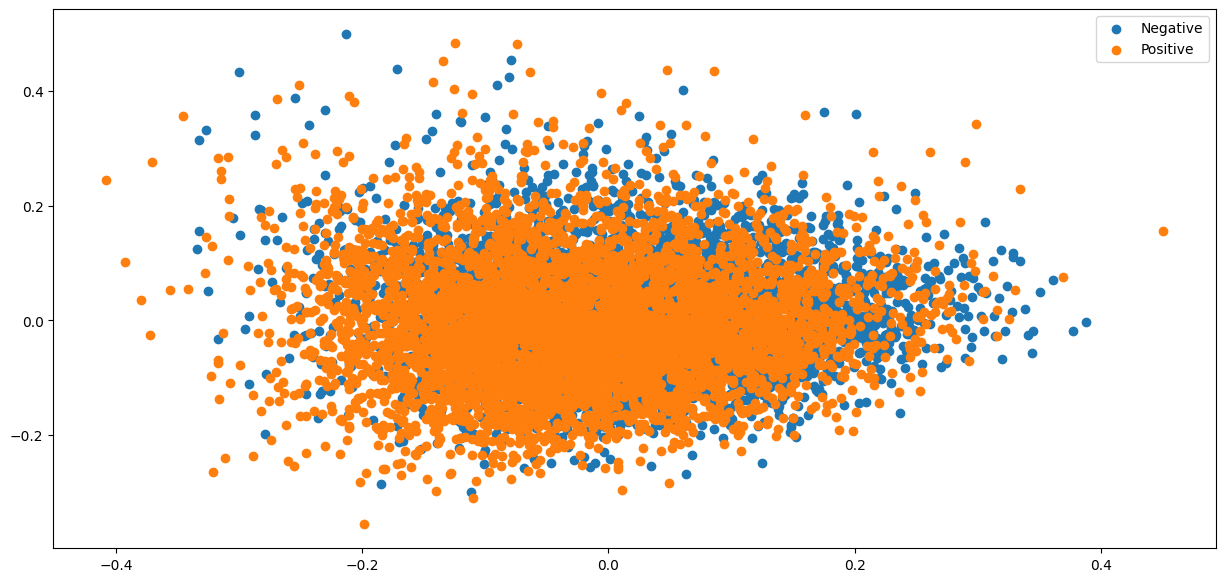

In [ ]:
# dimensionality reduction for bag of words 

pca = PCA(n_components=2)
test_data_wv_pca = pca.fit_transform(X_test_wv)

'''
Plotting the result
'''
plt.figure(figsize=(15,7))
from numpy import where

plt.figure(figsize=(15,7))
for class_value in range(2):

 # get row indexes for samples with this class
 row = where(y_test_wv == class_value)
 if class_value == 0:
    label = "Negative"
 else:
    label = "Positive"
 # create scatter of these samples
 plt.scatter(test_data_wv_pca[row, 0], test_data_wv_pca[row, 1] , label = label)
plt.legend()
plt.show()